### **Chapter 8: Deep Auto Encoder**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape
from tensorflow.keras import regularizers

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [ ]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()
# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # 28x28 =>
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

In [ ]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 24.5


In [ ]:
# Deep Autoencoder
autoencoder = Sequential()
# Encoder Layers
# input: 784
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,),
activation='relu')) # (**)
autoencoder.add(Dense(2 * encoding_dim, activation='relu')) # (*)
autoencoder.add(Dense(encoding_dim, activation='relu')) # co chai
# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu')) # (*)
autoencoder.add(Dense(4 * encoding_dim, activation='relu')) # (**)
autoencoder.add(Dense(input_dim, activation='sigmoid')) # output: 784
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [ ]:
# Encoder Model
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img,
encoder_layer3(encoder_layer2(encoder_layer1(input_img))))
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.2452 - val_loss: 0.1636
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1478 - val_loss: 0.1356
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1310 - val_loss: 0.1241
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1225 - val_loss: 0.1186
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1174 - val_loss: 0.1134
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1126 - val_loss: 0.1095
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1088 - val_loss: 0.1056
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1058 - val_loss: 0.1032
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1035 - val_loss: 0.1012
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1016 - val_lo

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0],
size=num_images)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

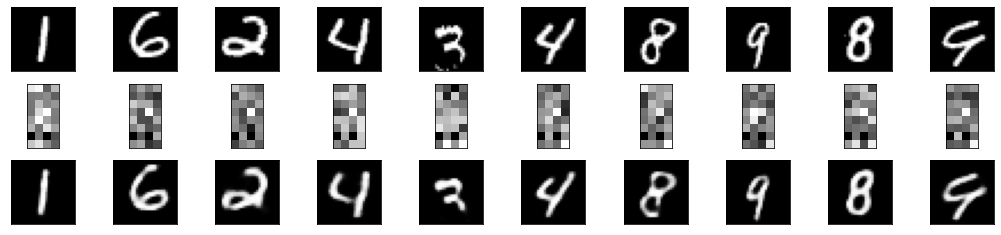

In [ ]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# # save model
# autoencoder.save('deep_decoder.h5')
# #print("save!!!")

In [ ]:
# encoder.save('deep_encoder.h5')

In [ ]:
# # Predicting on Test Data, model load from file
# from tensorflow.keras.models import load_model
# encoder = load_model('deep_encoder.h5')
# decoder = load_model('deep_decoder.h5')

In [ ]:
num_images = 5
np.random.seed(0)
random_test_images = np.random.randint(x_test.shape[0],
size=num_images)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(x_test)

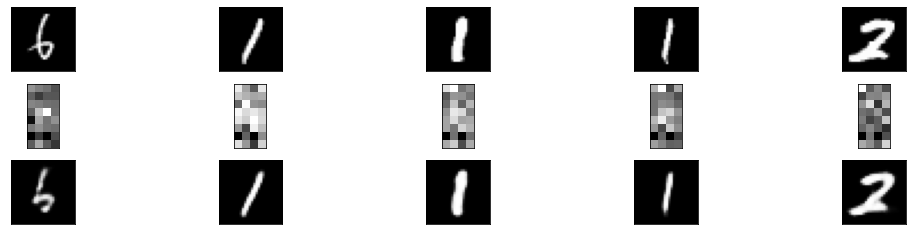

In [ ]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()